In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline 

In [2]:
filename = '../colliders.csv'
data = np.loadtxt(filename,delimiter=',',dtype='Float64',skiprows=2)
print(data)

[[-310.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-300.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-290.2389   -439.2315     85.5         5.          5.         85.5     ]
 ...
 [ 257.8061    425.1645      1.75852     1.292725    1.292725    1.944791]
 [ 293.9967    368.3391      3.557666    1.129456    1.129456    3.667319]
 [ 281.5162    354.4156      4.999351    1.053772    1.053772    4.950246]]


In [3]:
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('planning_utils_from_seed_project.py'))))
from planning_utils_from_seed_project import create_grid, a_star, heuristic, Action
from udacidrone.frame_utils import global_to_local, local_to_global

In [4]:
TARGET_ALTITUDE = 5
SAFETY_DISTANCE = 5
global_home = np.array([-122.39745, 37.79248, 0.0])
print(f'Global Home     => [lon, lat, alt]     : {global_home}')
global_position = np.array([-122.3974512, 37.7924799, 0.147])
print(f'Global Position => [lon, lat, alt]     : {global_position}')
local_position = global_to_local(global_position, global_home)
print(f'Local Position  => [north, east, down] : {local_position}')

Global Home     => [lon, lat, alt]     : [-122.39745   37.79248    0.     ]
Global Position => [lon, lat, alt]     : [-122.3974512   37.7924799    0.147    ]
Local Position  => [north, east, down] : [-0.01177589 -0.10558296 -0.147     ]


In [5]:
grid, north_offset, east_offset  = create_grid(data, TARGET_ALTITUDE, SAFETY_DISTANCE)
print(f'Grid offset : ({north_offset}, {east_offset})')
grid_start_north = int(np.ceil(local_position[0] - north_offset))
grid_start_east = int(np.ceil(local_position[1] - east_offset))
grid_start = (grid_start_north, grid_start_east)
print(f'Grid star : {grid_start}')

Grid offset : (-316, -445)
Grid star : (316, 445)


In [6]:
grid_goal_north = grid_start_north + 400
grid_goal_east = grid_start_east + 400
grid_goal = (grid_goal_north, grid_goal_east)
print(f'Grid goal : {grid_goal}')

goal_local_position_north = grid_goal_north + north_offset
goal_local_position_east = grid_goal_east + east_offset
goal_local_position = np.array([goal_local_position_north, goal_local_position_east, local_position[2]])
print(f'Goal Local Position => [north, east, down]     : {goal_local_position}')

goal_global_position = local_to_global(goal_local_position, global_home)
print(f'Global Global Position => [lon, lat, alt]     : {goal_global_position}')



Grid goal : (716, 845)
Goal Local Position => [north, east, down]     : [ 4.00e+02  4.00e+02 -1.47e-01]
Global Global Position => [lon, lat, alt]     : [-122.39287756   37.79606176    0.147     ]


Found a path.
Path cost: 448160.0645114182
Waypoint count : 1283


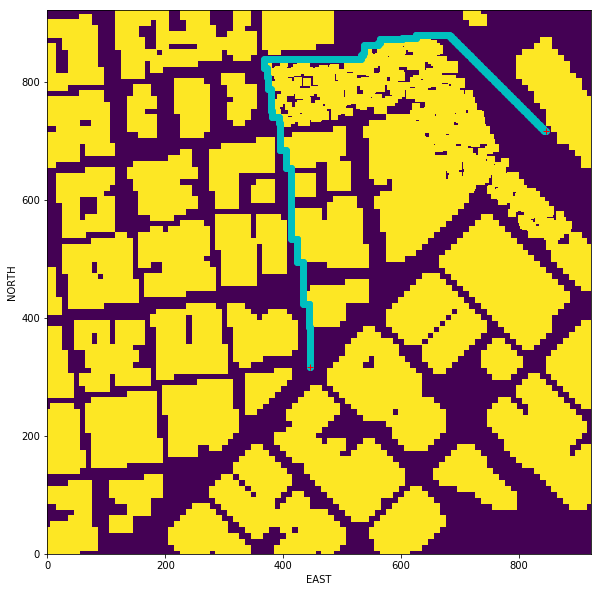

In [7]:
def visualize_path(g_start, g_goal, g, n_offset, e_offset):
    """
    Visualize the path to get from `g_start` to `g_goal` defined by `waypoints` and the grid `g`
    """
    path, cost = a_star(g, heuristic, grid_start, grid_goal)
    print(f'Path cost: {cost}')
    
    waypoints = np.array([[p[0] + n_offset, p[1] + e_offset, TARGET_ALTITUDE, 0] for p in path])
    print(f'Waypoint count : {waypoints.shape[0]}')
    
    fig = plt.figure(figsize=(20,10))   
    plt.imshow(g, origin='lower') 
    plt.plot(g_start[1] + waypoints[:, 1], g_start[0] + waypoints[:, 0], 'g')
    plt.plot(g_start[1] + waypoints[:, 1], g_start[0] + waypoints[:, 0], 'oc')
    plt.plot(g_start[1], g_start[0], 'r+')    
    plt.plot(g_goal[1], g_goal[0], 'r+')
    plt.xlabel('EAST')
    plt.ylabel('NORTH')
    plt.show()
    
    return waypoints
    
wps = visualize_path(grid_start, grid_goal, grid, north_offset, east_offset)